#Assignment #6: Time series prediction with SARIMA versus Linear Regression

Karim Kanji

IA-20

---




#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import datetime
!pip install pmdarima
from pmdarima.arima import auto_arima

#### File upload

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Data for Assignment SARIMA and LinRegression.xlsx to Data for Assignment SARIMA and LinRegression.xlsx


#### Splitting the data

In [49]:
path = 'Data for Assignment SARIMA and LinRegression.xlsx'
exports_df = pd.read_excel(path, sheet_name='Exports')
print(exports_df.head())
population_df = pd.read_excel(path, sheet_name='Population')
print(population_df.head())

  Month  Year  Exports by Atlantis in Million USD
0   Jan  2013                           50.524814
1   Feb  2013                           36.997935
2   Mar  2013                           44.033984
3   Apr  2013                           52.091281
4   May  2013                           61.166440
  Month  Year  Births this month  Deaths this month  \
0   Jan  2013        2013.487323        4057.488144   
1   Feb  2013        1084.706441        3045.925688   
2   Mar  2013        3046.853338        2092.562583   
3   Apr  2013        2065.604583        1106.555276   
4   May  2013        3032.356074        1041.955603   

   Change in Population this month  Population at end of this month  
0                     -2044.000822                          1361968  
1                     -1961.219247                          1362024  
2                       954.290755                          1363968  
3                       959.049306                          1363972  
4                  

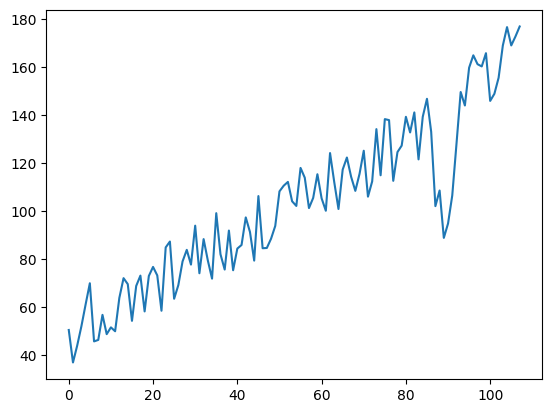

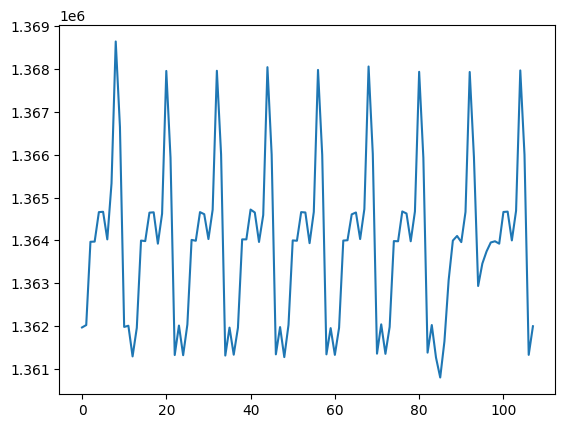

In [50]:
plt.plot(exports_df["Exports by Atlantis in Million USD"])
plt.show()

print("\n")

plt.plot(population_df["Population at end of this month"])
plt.show()

In [51]:

exports_arima_model = auto_arima(
    exports_df['Exports by Atlantis in Million USD'],
    seasonal=True,
    m=12,
    suppress_warnings=True
)

exports_arima_forecast = exports_arima_model.predict(n_periods=6)

population_arima_model = auto_arima(
    population_df['Population at end of this month'],
    seasonal=True,
    m=12,
    suppress_warnings=True
)

population_arima_forecast = population_arima_model.predict(n_periods=6)

print("AUTO ARIMA export prediction:")
print(exports_arima_forecast)
print("AUTO ARIMA population prediction:")
print(population_arima_forecast)

AUTO ARIMA export prediction:
108    172.968601
109    172.070286
110    173.219287
111    174.368288
112    175.517289
113    176.666290
dtype: float64
AUTO ARIMA population prediction:
108    1363744.0
109    1363952.0
110    1363980.0
111    1363924.0
112    1364664.0
113    1364672.0
dtype: float64


In [47]:

months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

exports_df['Month'] = exports_df['Month'].apply(lambda x: months[x])

x = exports_df[['Year', 'Month']]
y = exports_df['Exports by Atlantis in Million USD']

lr_model = LinearRegression()
lr_model.fit(x, y)


start_date = datetime.datetime(2022, 1, 1)
next_six_months = pd.DataFrame({'Year': [start_date.year]*6, 'Month': range(start_date.month, start_date.month+6)})
next_six_months['Month'] = next_six_months['Month'].apply(lambda z: 12 if z == 0 else z)
lr_preds = lr_model.predict(next_six_months)

print(f"Linear regression exports predictions: {lr_preds}")

Linear regression exports predictions: [158.53371979 159.5660311  160.59834242 161.63065373 162.66296504
 163.69527636]


In [8]:

month_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
population_df['Month'] = population_df['Month'].apply(lambda x: month_dict[x])


X = population_df[['Year', 'Month']]
y = population_df['Population at end of this month']

lr_model = LinearRegression()
lr_model.fit(X, y)


start_date = datetime.datetime(2022, 1, 1)
next_six_months = pd.DataFrame({'Year': [start_date.year]*6, 'Month': range(start_date.month, start_date.month+6)})
next_six_months['Month'] = next_six_months['Month'].apply(lambda x: 12 if x == 0 else x)
lr_preds = lr_model.predict(next_six_months)

print(f"Linear regression population predictions: {lr_preds}")

Linear regression population predictions: [1363167.8482906  1363301.13344988 1363434.41860917 1363567.70376845
 1363700.98892774 1363834.27408702]


As we can see the population predictions are very similar both in the linear regression analysis and in the autoARIMA. Meanwhile the lr predictions for exports was slightly lower than that of the autoARIMA


ps. Had assistance with the code from another friend in the course, so props to him for help with thee code